# Support Vector Regression (SVR)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("/home/abbas/NAVTTEC/Dataset_files/csvfiles/Position_Salaries.csv")
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
x=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values

In [4]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [5]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [13]:
y=y.reshape(len(y),1)

In [14]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

# Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [17]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [18]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


# Training the SVR model on the whole dataset

In [19]:
from sklearn.svm import SVR
regressor = SVR(kernel = "rbf")
regressor.fit(x,y)

/home/abbas/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

# Predicting a new result

In [24]:
sc_y.inverse_transform(regressor.predict(sc_x.inverse_transform([[6.5]])))

array([0.01150915])

# Visulizating the SVR Result

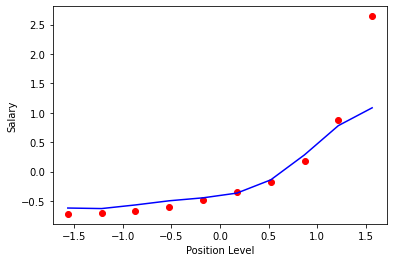

In [17]:
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color = 'red')
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(regressor.predict(x)),color='blue')
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

# Visulatising the SVR results (for higher resolution and smoother curve)

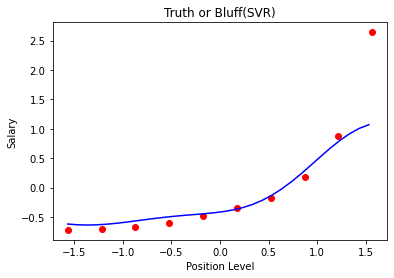

In [20]:
x_grid = np.arange(min(sc_x.inverse_transform(x)),max(sc_x.inverse_transform(x)), 0.1)
x_grid= x_grid.reshape(len(x_grid), 1)
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y), color='red')
plt.plot(x_grid,sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid))), color='blue')
plt.title("Truth or Bluff(SVR)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()